In [1]:
import numpy as np
import pandas as pd
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
from community import community_louvain

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_path = '/notebooks/social network/HW2/data/'
email = 'email-Eu-core.txt'
question = 'question.txt'

In [3]:
df = pd.read_csv(data_path+email, sep=" ", header=None)
df.columns = ['node_1', 'node_2']
df.head()

,node_1,node_2
0,0,1
1,2,3
2,2,4
3,5,6
4,5,7


In [4]:
df.shape

(25571, 2)

In [5]:
def to_graph(df):
    G=nx.Graph()
    for i in range(df.shape[0]):
        G.add_edge(df.iloc[i]['node_1'],df.iloc[i]['node_2'])
        
    return G

In [6]:
%%time
G = to_graph(df)

CPU times: user 4.84 s, sys: 0 ns, total: 4.84 s
Wall time: 4.83 s


In [7]:
# get the degree of all nodes
d = nx.degree(G)
dict_d = dict(d)

In [8]:
# compute the node size
n_size = [v * 5 for v in dict_d.values()]

In [9]:
#first compute the best partition
partition = community_louvain.best_partition(G,resolution=0.65)

In [10]:
import itertools

# print the dictionary in slice
dict(itertools.islice(partition.items(), 10))

{0: 0, 1: 0, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 2, 8: 2, 9: 2}

In [11]:
# Let dict_d and partition in the same order for node color 
partition_to_order = []
for i in dict_d.keys():
    partition_to_order.append(partition[i])

(-270.3879970043365, 373.2585502956643, -312.4845366600806, 348.0251046081322)

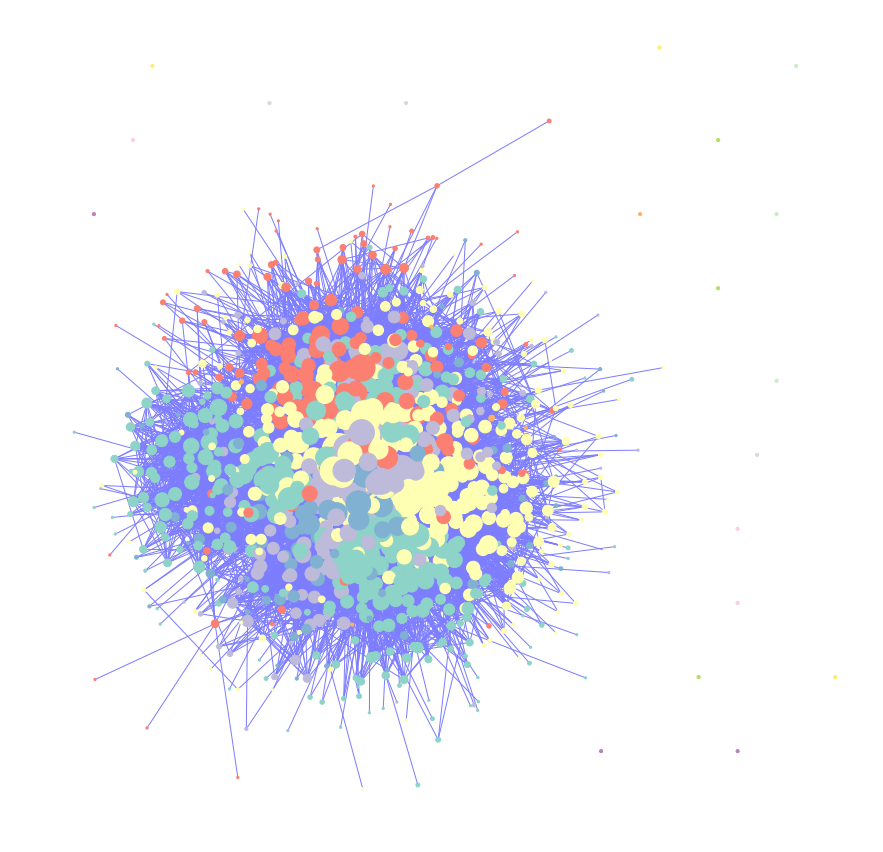

In [12]:
plt.figure(figsize=(15,15))
pos = graphviz_layout(G)

nx.draw_networkx_edges(G, pos, edge_color='#7d7dff')
nx.draw_networkx_nodes(G,pos,nodelist=dict_d.keys(), node_size=n_size, 
                       prog='dot', cmap=plt.get_cmap('Set3'), node_color=partition_to_order)

plt.axis('off')

In [13]:
question_df = pd.read_csv(data_path+question, sep=",", header=None)
question_df.columns = ['id','node_1', 'node_2']
question_df.head()

,id,node_1,node_2
0,id,node_1,node_2
1,0,353,371
2,1,239,728
3,2,877,118
4,3,475,740


In [14]:
question_df = question_df.drop(0).reset_index(drop=True)
question_df.head()

,id,node_1,node_2
0,0,353,371
1,1,239,728
2,2,877,118
3,3,475,740
4,4,955,383


In [15]:
question_df.shape

(5000, 3)

In [16]:
def compare_community(df,partition):
    answer = []
    
    for i in range(df.shape[0]):
        n1 = df.iloc[i]['node_1']
        n2 = df.iloc[i]['node_2']
        
        c_n1 = partition[int(n1)]
        c_n2 = partition[int(n2)]
        
        if c_n1==c_n2:
            answer.append(1)
        else:
            answer.append(0)
            
    return answer

In [17]:
answer = compare_community(question_df, partition)

In [18]:
answer[:10]

[1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [19]:
submit = pd.DataFrame({'id':list(range(len(answer))),
                       'prediction':answer
                        },columns = ['id','prediction'])

In [20]:
submit.head()

,id,prediction
0,0,1
1,1,0
2,2,0
3,3,0
4,4,0


In [21]:
submit.to_csv('submit.csv', index=False)